# Imports

In [87]:
import sklearn as skl
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline


---
# Compreensão do Âmbito do Dataset

O Dataset de teino é constituido por 18835 casos e pelos seguintes atributos:

* **song name:** nome da música
* **song_popularity:** valores entre 0 e 100
* **song_duration_ms:** duração da música em milisegundos; tipicamente valores entre 200k e 300k
* **acousticness:** valores entre 0 e 1
* **danceability:** valores entre 0 e 1
* **energy:** valores entre 0 e 1
* **instrumentalness:** valores entre 0 e 1
* **key:** todas as chaves em oitava codificadas como valores entre 0 e 11, começando com C como 0, C como 1, etc.
* **liveness:** valores entre 0 e 1
* **loudness:** float com valores tipicamente entre -60 e 0
* **audio_mode:** 0 = menor, 1 = maior
* **speechiness:** valores entre 0 e 1
* **tempo:** float com valores tipicamente entre 50 e 150
* **audio_valence:** quão felizes a feliz a música é; valores entre 0 e 1
* **time-signature:** valores entre 1 e 5

---
# Compreensão dos Dados

In [88]:
# Get the data 
song_df = pd.read_csv('song_data.csv')
song_df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [89]:
song_df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [90]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [91]:
# Check missing values
song_df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [92]:
# Check unique values
song_df.nunique()

song_name           13070
song_popularity       101
song_duration_ms    11771
acousticness         3209
danceability          849
energy               1132
instrumentalness     3925
key                    12
liveness             1425
loudness             8416
audio_mode              2
speechiness          1224
tempo               12112
time_signature          5
audio_valence        1246
dtype: int64

In [93]:
# Check how many songs are duplicated
song_df.duplicated().sum()

3909

In [94]:
# Check Min and max values for each column
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

song_df.apply(minMax)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
min,"""40"" - Live Version 1983",0,12000,0.000001,0.000,0.00107,0.000,0,0.0109,-38.768,0,0.000,0.000,0,0.000
max,피 땀 눈물,100,1799346,0.996000,0.987,0.99900,0.997,11,0.9860,1.585,1,0.941,242.318,5,0.984


In [95]:
### CORRIGIR !!!!!!
# Avaliação do desempenho do modelo com regressão linear múltipla utilizando a classe OLS 
import statsmodels.api as sm

features = song_df.drop(["song_popularity"],axis=1) 
y = song_df["song_popularity"]
sm_model = sm.OLS(y,features).fit()
print(sm_model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# Binning para verificação do balanceamento dos dados

# Define the bin edges and labels
bin_edges = [0, 25, 50, 75, 100]
bin_labels = ['low', 'medium', 'high','very high']

# Create bins using the "cut" function and assign labels
song_df['song_popularity_bins'] = pd.cut(song_df['song_popularity'], bin_edges, labels=bin_labels)

# Print the resulting dataframe
print(song_df)


                        song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
18830              Let It Breathe               60            159645   
18831                     Answers               60            205666   
18832      Sudden Love (Acoustic)               23            182211   
18833           Gentle on My Mind               55            352280   
18834                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.0000

In [ ]:
# Count the number of observations in each bin
bin_counts = song_df['song_popularity_bins'].value_counts()

# Print the bin counts
print(bin_counts)


high         6880
medium       4870
low          1956
very high     981
Name: song_popularity_bins, dtype: int64


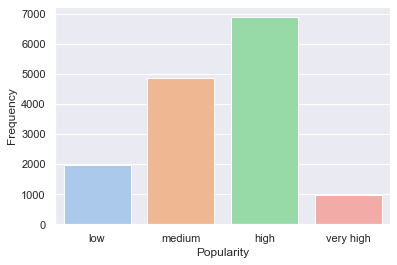

In [ ]:
# Create a countplot of the binned variable
sns.countplot(x="song_popularity_bins", data=song_df)

# Add labels and show the plot
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


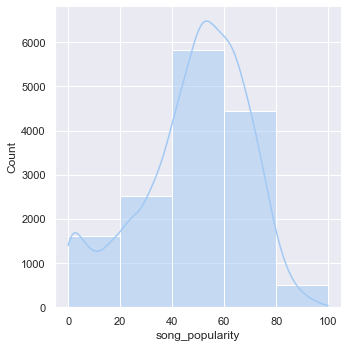

In [ ]:
# Create a distplot of the binned variable
sns.displot(song_df, x='song_popularity', bins=5, kde=True, stat='count')


### Visualização dos dados

<AxesSubplot:>

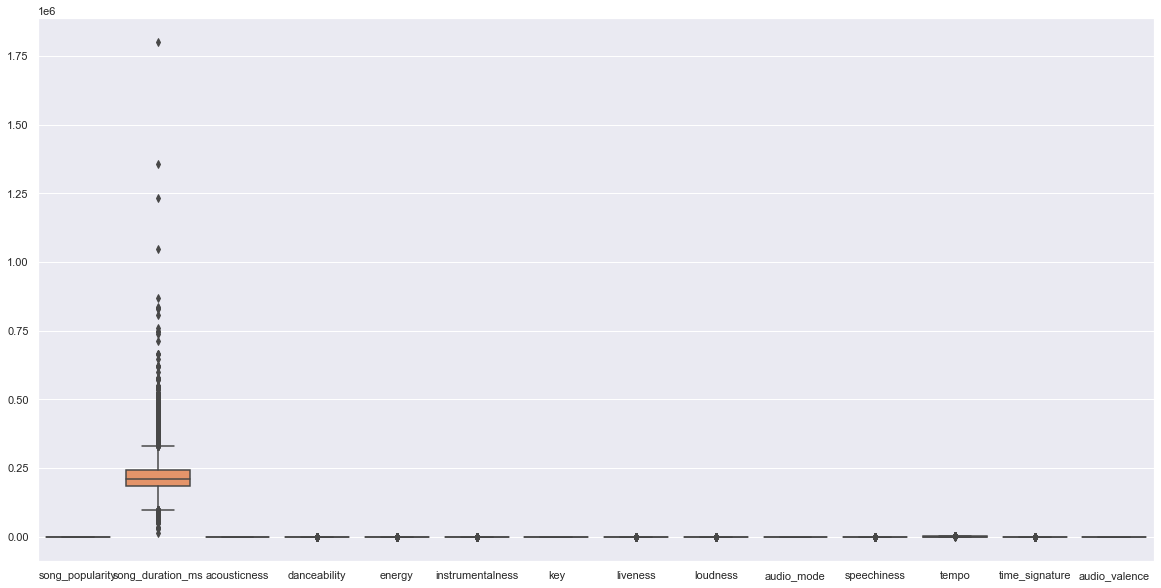

In [ ]:
# Outliers boxplot
sns.set_theme(palette="pastel")
plt.subplots(figsize=(20,10))
sns.boxplot(data=song_df)

<AxesSubplot:>

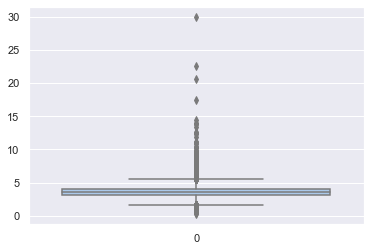

In [ ]:
# Outliers em minutos
sns.boxplot(data=song_df['song_duration_ms'].apply(lambda x: x/60000))

<AxesSubplot:>

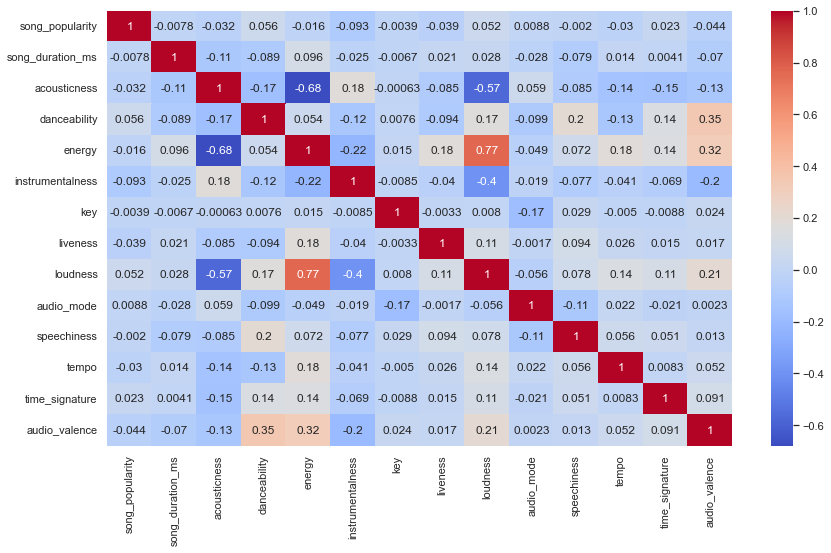

In [ ]:
# Matriz de Correlação
plt.subplots(figsize=(14,8))
sns.heatmap(song_df.corr(), annot = True, cmap='coolwarm')

---
# Preparação dos Dados


### Remove duplicates and song name

In [102]:
# Remove duplicates
song_df = song_df.drop_duplicates()

# Remove music name (unique id)
song_df = song_df.drop(['song_name'], axis=1)


### One Hot Encoding

In [ ]:
# One Hot Encoding
for i in song_df.columns:
    if song_df[i].nunique() == 2:
        song_df[i] = pd.get_dummies(song_df[i], drop_first=True, prefix=i)
    elif song_df[i].nunique() > 2 and song_df[i].nunique() < 16:
        song_df = pd.concat([song_df, pd.get_dummies(song_df[i], prefix=i)], axis=1)
        song_df = song_df.drop([i], axis=1)

song_df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,...,key_7,key_8,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,1,...,0,1,0,0,0,0,0,0,1,0
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0,...,0,0,0,0,0,0,0,0,1,0
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0.2550,-7.828,1,...,0,0,0,0,0,0,0,0,1,0
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,1,...,0,0,0,0,0,0,0,0,1,0
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,1,...,0,0,0,1,0,0,0,0,1,0


### Remove Outliers

In [ ]:
# Remove outliers
for i in song_df.columns:
    if(song_df[i].nunique() >= 16): #Não categoricos
        mean=song_df[i].mean()

        skewness=song_df[i].skew()

        if(skewness > 0.5 or skewness < -0.5): #Distriuido normalmente
            upper=song_df[i].mean() + 3*song_df[i].std()
            lower=song_df[i].mean() - 3*song_df[i].std()

            song_df = song_df[(song_df[i] <= upper) & (song_df[i] >= lower)]
            song_df = song_df.reset_index(drop=True) 
        else: #Distribuido não normalmente (Skewed)
            q1 = song_df[i].quantile(0.25)
            q3 = song_df[i].quantile(0.75)
            iqr = q3 - q1
            upper = q3 + 1.5*iqr
            lower = q1 - 1.5*iqr

            song_df = song_df[(song_df[i] <= upper) & (song_df[i] >= lower)]
            song_df = song_df.reset_index(drop=True) 

### Normalization

In [ ]:
# Data normalization
for i in song_df.columns:
        max_value = song_df[i].max()
        min_value = song_df[i].min()
        song_df[i] = (song_df[i] - min_value) / (max_value - min_value)

song_df.describe()

---
## Balancing Data - StratifiedShuffleSplit


In [ ]:
# Stratified Sampling Approach (Downsample)
from sklearn.model_selection import StratifiedShuffleSplit

# Define the target variable
y = song_df['song_popularity_bins']

# Perform stratified sampling
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.7)
for train_index, test_index in sss.split(song_df, y):
    downsampled_df = song_df.iloc[test_index]

# Print the resulting dataframe
print(downsampled_df)


       song_popularity  song_duration_ms  acousticness  danceability  energy  \
17011               44            302560       0.04270         0.522   0.833   
18100               32            246466       0.19100         0.756   0.770   
11865               55            173375       0.02780         0.475   0.739   
9777                46            160746       0.34400         0.506   0.655   
13285               18            287120       0.99300         0.603   0.224   
...                ...               ...           ...           ...     ...   
10360               64            213060       0.33700         0.655   0.811   
7033                48            230000       0.14900         0.720   0.844   
17727               42            173141       0.54900         0.571   0.708   
16455               60            211237       0.03120         0.602   0.547   
7135                18            281666       0.00913         0.628   0.805   

       instrumentalness  key  liveness 

<AxesSubplot:xlabel='song_popularity', ylabel='Density'>

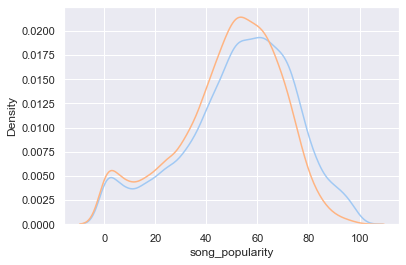

In [ ]:
# Distribution plot
sns.kdeplot(song_df['song_popularity'], label = "Original")
sns.kdeplot(downsampled_df['song_popularity'], label = "Modified")

/Users/teresafortes/opt/anaconda3/envs/daa2223/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='song_popularity', ylabel='Density'>

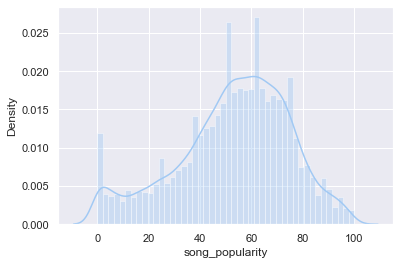

In [ ]:
sns.distplot(song_df.song_popularity)

/Users/teresafortes/opt/anaconda3/envs/daa2223/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='song_popularity', ylabel='Density'>

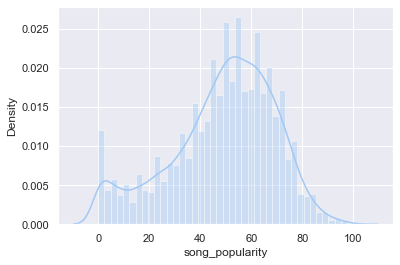

In [ ]:
sns.distplot(downsampled_df.song_popularity)

---  
# Supervised Learning - Regression models

---
## Multiple Linear Regression

In [109]:
from sklearn import linear_model

# Initialize model
multi_reg_model =  linear_model.LinearRegression()

# Predictors an target
X = song_df.drop(["song_popularity"],axis=1) 
y = song_df["song_popularity"]

# Split data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

# Train the model using the song_df data
multi_reg_model.fit(X_train,y_train)

y_pred = multi_reg_model.predict(X_test)
y_pred

# Check trained model y-intercept
#print(multi_reg_model.intercept_)

# Check trained model coefficients
#print(multi_reg_model.coef_)

# Check R-squared
print("Multiple Linear Regression R-squared:",multi_reg_model.score(X,y))


Multiple Linear Regression R-squared: 0.02285572198630159


## Plot the Results

In [111]:
from sklearn.metrics import r2_score

accuracy=r2_score(y_test,y_pred)
print("Accuracy of the model is %.4f" %accuracy)

Accuracy of the model is 0.0245


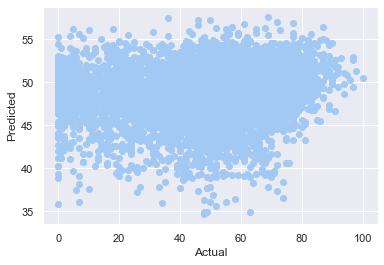

In [112]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

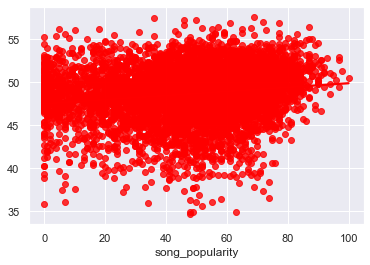

In [113]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

---
## Artificial Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, AvgPool2D, BatchNormalization
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

target_ANN = ['song_popularity']
predictors_ANN = ['song_duration_ms','acousticness','danceability','energy','instrumentalness','liveness','loudness','audio_mode','speechiness','key_7','key_8','key_9','key_10','key_11','time_signature_0','time_signature_1','time_signature_3','time_signature_4','time_signature_5']

X_ann = song_df[predictors_ANN].values
y_ann = song_df[target_ANN].values

X_train_ANN, X_test_ANN, y_train_ANN, y_test_ANN = train_test_split(X_ann, y_ann, test_size=0.3, random_state=42)

# create ANN model
model_ann = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model_ann.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically

model_ann.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model_ann.add(Dense(units=1, kernel_initializer='normal'))

# Compiling the model
model_ann.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model_ann.fit(X_train_ANN, y_train_ANN ,batch_size = 20, epochs = 30, verbose=1)

---
# Hyperparameter tuning of ANN
## Grid Search
### Finding best set of parameters using manual Grid Search

In [ ]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train_ANN, y_train_ANN, X_test_ANN, y_test_ANN):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    SearchResultsData = pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model_ann = Sequential()
            # Defining the first layer of the model
            model_ann.add(Dense(units=5, input_dim=X_train_ANN.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model_ann.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model_ann.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model_ann.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model_ann.fit(X_train_ANN, y_train_ANN ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test_ANN-model_ann.predict(X_test_ANN))/y_test_ANN))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

######################################################
# Calling the function
ResultsData = FunctionFindBestParams(X_train_ANN, y_train_ANN, X_test_ANN, y_test_ANN)

In [ ]:
# Plotting the parameter trial results
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

## Training the ANN model with the best parameters

In [ ]:
# Fitting the ANN to the Training set
model_ann.fit(X_train_ANN, y_train_ANN ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions = model_ann.predict(X_test_ANN)

# Scaling the predicted Price data back to original price scale
Predictions = targetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig = targetVarScalerFit.inverse_transform(y_test_ANN)

# Scaling the test data back to original scale
Test_Data = predictorScalerFit.inverse_transform(X_test_ANN)

TestingData = pd.DataFrame(data=Test_Data,columns=predictors_ANN)
TestingData['song_popularity']=y_test_orig
TestingData['Predicted_song_popularity']=Predictions
TestingData.head()

--- 
## Grid Search Cross-validation
### Finding best hyperparameters using GridSearchCV 

In [ ]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                    'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                }

# Creating the regression ANN model
RegModel = KerasRegressor(make_regression_ann, verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*50,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search = GridSearchCV(estimator=RegModel, 
                        param_grid=Parameter_Trials, 
                        scoring=custom_Scoring, 
                        cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime = time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime = time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_

## Finding the accuracy of the model
### Mean Absolute Percentage Error(MAPE)

In [ ]:
# Computing the absolute percent error
APE=100*(abs(TestingData['song_popularity']-TestingData['Predicted_song_popularity'])/TestingData['song_popularity'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

---
## Decision Tree Regression

In [ ]:
X_dt = song_df.drop(["song_popularity"],axis=1)
y_dt = song_df["song_popularity"]

print(X_dt)
print(y_dt)

# Splitting the dataset into training and testing set (80/20)
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size = 0.2, random_state = 28)

In [ ]:
#Import the regressor
from sklearn.tree import DecisionTreeRegressor 

#Create a regressor object
dt_regressor = DecisionTreeRegressor(random_state = 0) 

#Fit the regressor with X and Y data
dt_regressor.fit(X_train_dt, y_train_dt)

dt_predictions = dt_regressor.predict(X_dt)

## Calculating the loss after training

In [ ]:
# Predicting the target values of the test set
y_pred_dt = dt_regressor.predict(X_test_dt)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test_dt, y_pred_dt)), '.3f'))
print("\nRMSE: ", rmse)

## Visualising the results

In [ ]:
# Plot the regression tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,16))
plot_tree(dt_regressor, feature_names=X_dt.columns);

---
## Random Forest Regression

In [ ]:
X_rf = X_dt = song_df.drop(["song_popularity"],axis=1)
y_rf = song_df["song_popularity"]

In [ ]:
# Splitting the dataset into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size = 0.2, random_state = 28)

In [ ]:
#Import the regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Create regressor object
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fit the Random Forest Regression to the dataset
rf_regressor.fit(X_train_rf,y_train_rf)


## Calculating the loss after training

In [ ]:

# Predicting the target values of the test set
y_pred_rf = rf_regressor.predict(X_test_rf)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test_rf, y_pred_rf)), '.3f'))
print("\nRMSE: ", rmse)

## Visualising the results

In [ ]:
# Visualising the Random Forest Regression results
X_grid = np.arange(min(X), max(X), 0.01) 

# Reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))

# Scatter plot for original data
plt.scatter(X, y, color = 'blue')  

# Plot predicted data
plt.plot(X_grid, rf_regressor.predict(X_grid), 
        color = 'blue') 
plt.title('Random Forest Regression')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

---
# Support Vector Regression 

In [ ]:
from sklearn.svm import SVR

X_svr = song_df.drop(["song_popularity"],axis=1)
y_svr = song_df["song_popularity"]

In [ ]:
# Feature scaling
sc_x = StandardScaler()
X_svr = sc_x.fit_transform(X_svr)
sc_y = StandardScaler()
y_svr = sc_y.fit_transform(y_svr)

In [ ]:
# Splitting the dataset into training and testing set (80/20)
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr, y_svr, test_size = 0.2, random_state = 28)

In [ ]:
# Initializing the SVR model with 10 decision trees
svr_model = SVR(kernel = 'rbf')

# Fitting the SVR model to the data
svr_model.fit(X_train_svr, y_train_svr.ravel())

## Calculating the loss after training

In [ ]:
# Predicting the target values of the test set
y_pred = svr_model.predict(X_test_svr)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test_svr, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

---
# RANSAC (Robust Regression)

---  ---
### END OF MODELS
--- ---



---    
# Cross Validation
For model selection. Decide which model produces the best results.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm

## K-Fold CV

In [ ]:
# Escolher entre 5-10 folds
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Use k-fold CV to evaluate model
scores = cross_val_score(model_ann, X_ANN, y_ANN, scoring='neg_mean_absolute_error',
                        cv=cv, n_jobs=-1)

# Escolher este ou o de cima, descomentando
#scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
#                        cv=cv, n_jobs=-1)

#view MAE
mean(absolute(scores))

# Para o scores de baixo 
#view RMSE
#sqrt(mean(absolute(scores)))

--- 
# PyCaret
### Machine learning and model management tool that speeds up the experiment cycle exponentially 

In [119]:
!pip install pycaret
!pip install imbalanced-learn==0.7.0

  Using cached parso-0.7.1-py2.py3-none-any.whl (109 kB)
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
  Attempting uninstall: parso
    Found existing installation: parso 0.8.3
    Uninstalling parso-0.8.3:
      Successfully uninstalled parso-0.8.3


In [ ]:
X = song_df.drop(["song_popularity"],axis=1)
y = song_df["song_popularity"]

# Splitting the dataset into training and testing set (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [ ]:
# init setup
from pycaret.utils import enable_colab
from pycaret.regression import *

s = setup(X_train, target = "song_popularity")

# model training and selection
best = compare_models()

# analyze best model
evaluate_model(best)

# predict on new data
predictions = predict_model(best, data = X_test)

# save best pipeline
save_model(best, 'my_best_pipeline')